<p><font size="6" color='grey'> <b>
Machine Learning
</b></font> </br></p>
<p><font size="5" color='grey'> <b>
Supervised Learning - Decision Tree - Titanic
</b></font> </br></p>

---


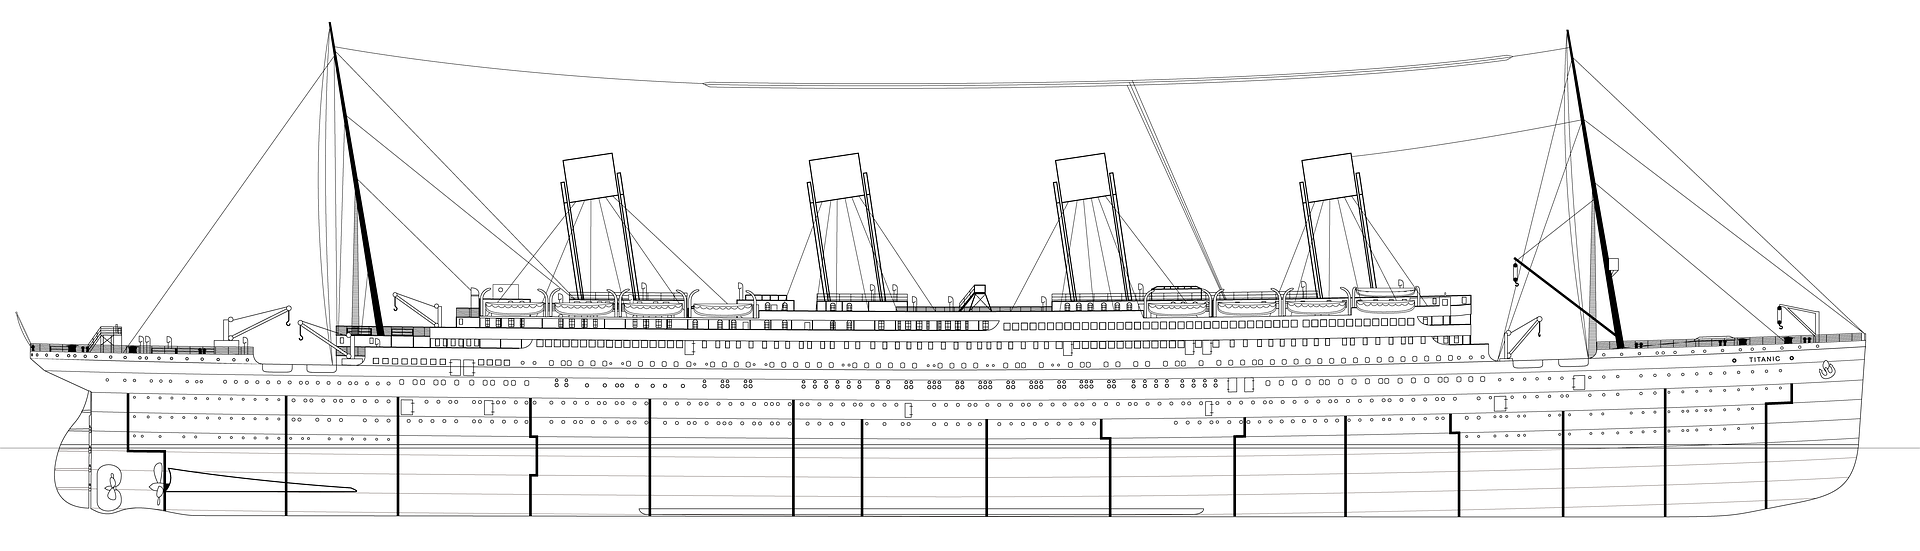

Bild von <a href="https://pixabay.com/de/users/axonia-14892766/?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=6068711">axonia</a> auf <a href="https://pixabay.com/de//?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=6068711">Pixabay</a>

# **1  <font color='orange'>|</font> Understand**
***


<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Aufgabe verstehen</br>
✅ Daten sammeln</br>
✅ Statistische Analyse (Min, Max, Mean, Korrelation, ...)</br>
✅ Datenvisualisierung (Streudiagramm, Box-Plot, ...)</br>
✅ Prepare Schritte festlegen</br>

<p><font color='black' size="5">
⚠️ Warnungen ausstellen
</font></p>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

<p><font color='black' size="5">
📒 Anwendungsfall
</font></p>

Dies ist der legendäre Titanic ML-Wettbewerb – die beste erste Herausforderung, um in ML-Modellierung einzutauchen.

Die Aufgabe ist einfach: Verwenden Sie maschinelles Lernen, um ein Modell zu erstellen, das vorhersagt, welche Passagiere den Schiffbruch der Titanic überlebt haben.

[Titanic Org](https://www.encyclopedia-titanica.org/)

[DataSet](https://www.openml.org/search?type=data&status=active&id=40945)

[Info](https://www.kaggle.com/competitions/titanic/data)



In [ ]:
import pandas as pd
from sklearn.datasets import fetch_openml
df = fetch_openml(parser='auto', target_column='default-target', data_id=40945)

data = df.data.copy()
target = df.target.copy()

<p><font color='black' size="5">
🔎 EDA (Exploratory Data Analysis) mit Pandas
</font></p>

In [ ]:
data.info()

In [ ]:
data.describe().T

In [ ]:
data.groupby('pclass').count()

In [ ]:
target.value_counts()

In [ ]:
_ = data.hist(figsize=(15,15))

In [ ]:
df.data

In [ ]:
data.head()

# **2 <font color='orange'>|</font> Prepare**

---

<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Nicht benötigte Features löschen</br>
✅ Datentyp ermitteln/ändern</br>
✅ Duplikate ermitteln/löschen</br>
✅ Missing Values behandeln</br>
✅ Ausreißer behandeln</br>
✅ Kategorischer Features codieren</br>
✅ Numerischer Features skalieren</br>
✅ Dimensionalität reduzieren</br>
✅ Datensampling (Over-/Undersampling)</br>
✅ Feature-Engineering (neue Features schaffen)</br>
✅ Pipeline erstellen/konfigurieren</br>

<p><font color='black' size="5">
🗑️ Löschen nicht benötigter Merkmale
</font></p>



In [ ]:
data.drop(['name', 'cabin', 'embarked', 'boat', 'body', 'fare', 'ticket', 'home.dest'], axis=1, inplace=True)

<p><font color='black' size="5">
👯 Duplikate
</font></p>

In [ ]:
duplicates = data[data.duplicated()]
print("Anzahl Duplicate: ", len(duplicates))

<p><font color='black' size="5">
🥛 Behandlung fehlender Daten
</font></p>

In [ ]:
data.isnull().sum()

In [ ]:
data.age = data.age.fillna(data.age.mean())

<p><font color='black' size="5">
🔣 Codierung der nicht numerischen Daten
</font></p>


In [ ]:
data.sex.replace(['male', 'female'], [0, 1], inplace=True)

<p><font color='black' size="5">
🔢 Typenanpassung category to numeric
</font></p>

In [ ]:
target = target.astype('int64')

# **3 <font color='orange'>|</font> Modeling**
---

<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Train-Test-Split erstellen</br>
✅ Modellauswahl treffen</br>
✅ Pipeline erweitern/konfigurieren</br>
✅ Training durchführen</br>

<p><font color='black' size="5">
✂️ Train-Test-Split
</font></p>


In [ ]:
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.20, random_state=42, stratify=target)
data_train.shape, data_test.shape, target_train.shape, target_test.shape

<p><font color='black' size="5">
🏃 Modellauswahl & Training
</font></p>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=4)
model.fit(data_train, target_train)

# **4 <font color='orange'>|</font> Evaluate**
---

<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Prognose (Train, Test) erstellen</br>
✅ Modellgüte prüfen</br>
✅ Residuenanalyse erstellen</br>
✅ Feature Importance/Selektion prüfen</br>
✅ Robustheitstest erstellen</br>
✅ Modellinterpretation erstellen</br>
✅ Sensitivitätsanalyse erstellen</br>
✅ Kommunikation (Key Takeaways)</br>

<p><font color='black' size="5">
🔭 Prognose
</font></p>

In [ ]:
target_train_pred = model.predict(data_train)
target_test_pred = model.predict(data_test)

<p><font color='black' size="5">
🎯 Accuracy
</font></p>

In [ ]:
from sklearn.metrics import accuracy_score
acc_train = accuracy_score(target_train, target_train_pred) * 100
print (f"Modell: {model} -- Train -- Accuracy: {acc_train:5.2f}")

In [ ]:
from sklearn.metrics import accuracy_score
acc_test = accuracy_score(target_test, target_test_pred) * 100
print (f'Modell: {model} -- Test -- Accuracy: {acc_test:5.2f}%')

<p><font color='black' size="5">
📱 Confusion Matrix
</font></p>

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
conf_matrix = confusion_matrix(target_test, target_test_pred)
display_labels_= ['Not Survived','Survived']
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=display_labels_)
disp.plot(cmap='Blues')

In [ ]:
print(classification_report(target_test, target_test_pred, target_names=display_labels_))

<p><font color='black' size="5">
🎲Aufbau Analysewürfel
</font></p>

In [ ]:
# Übernahme der Testdaten
cube = data_test.copy()
cube.reset_index(inplace=True)

# Übernahem Target real & predict
cube['real'] = pd.DataFrame(target_test.values, columns=['real'])
cube['predict'] = pd.DataFrame(target_test_pred, columns=['predict'])

<p><font color='black' size="5">
📊 Visualisierung real vs predict
</font></p>

In [ ]:
import plotly.express as px
import plotly.subplots as sp

In [ ]:
# Histogramm
title_ = 'Histogramm real vs predict'
fig = px.histogram(cube, x=['real', 'predict'], nbins=2, title=title_)
fig.update_layout(barmode='group',bargap=0.1, width=600, height=600)
fig.show()

<p><font color='black' size="5">
📛 Fehlerhafte Vorhersagen
</font></p>

In [ ]:
# real <> predict
cube[cube.real != cube.predict].describe().T

In [ ]:
cube[cube.real != cube.predict]

<p><font color='black' size="5">
📝 Einzelne Vorhersage
</font></p>

In [ ]:
# 2 neue Datensätze werden zur Prognose an das Modell übergeben: Rose & Jack (diCaprio/Winslet)
new_data = { 'pclass': [1, 3], 'sex': [1, 0], 'age': [22, 23], 'sibsp': [0, 0], 'parch': [0, 0] }
new = pd.DataFrame(new_data)

In [ ]:
# Vorhersage erstellen Rose & Jack
model.predict(new)

<p><font color='black' size="5">
❗Feature Importance
</font></p>

In [ ]:
import plotly.express as px
title_ = 'Feature Importance Titanic'
px.bar(x=model.feature_importances_, y=data.columns, title = title_, width=800, height=600).update_yaxes(categoryorder="total ascending")

<p><font color='black' size="5">
🌳 Darstellen des Entscheidungsbaums
</font></p>

Als Grafik mit graphviz

In [ ]:
import graphviz
from sklearn import tree
# DOT data
dot_data = tree.export_graphviz(model, out_file=None,
                                feature_names=data.columns,
                                class_names=display_labels_,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph

Als Grafik mit dtreeviz

In [ ]:
%%capture
try:
  import dtreeviz
except:
  !pip install -q dtreeviz
  import dtreeviz

In [ ]:
viz_model = dtreeviz.model(model,
                           data, target,
                           target_name="target",
                           class_names=display_labels_,
                           feature_names=data.columns)

In [ ]:
viz_model.view(scale=1.0, fontname='Monospace')

In [ ]:
viz_model.view(scale=1.2, orientation="LR", fontname='Monospace')

In [ ]:
# local Explanation
one = data_test.iloc[13]
viz_model.view(x=one, fontname='Monospace')

In [ ]:
# local Explanation
viz_model.view(x=one, show_just_path=True, fontname='Monospace')

In [ ]:
tree_img = viz_model.view(scale=0.8, fontname='Monospace')
tree_img.save('tree.svg')

# **5 <font color='orange'>|</font> Deploy**
---

<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Modellexport und -speicherung</br>
✅ Abhängigkeiten und Umgebung</br>
✅ Sicherheit und Datenschutz</br>
✅ In die Produktion integrieren</br>
✅ Tests und Validierung</br>
✅ Dokumentation & Wartung</br>